# US Tax Data Analysis and Clustering

---

## Problem Definition

**How company can optimize their ad spends based on the income data.**


Goal: Categorize the zip codes based on income distributions.

Limitation: _There should be no more than 10 clusters_



## Data

Individual Income Tax Statistics - 2019 ZIP Code Data (Statistics Of Income)

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.graph_objs as go
import plotly.express as px
import numpy as np

from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Here how our data looks like.

In [2]:

df = pd.read_csv("./data/19zpallnoagi.csv")
df.head()

STATEFIPS STATE  ZIPCODE  AGI_STUB         N1     MARS1     MARS2  \
0          1    AL        0         0 2100740.00 914850.00 743250.00   
1          1    AL    35004         0    5330.00   2310.00   2060.00   
2          1    AL    35005         0    3280.00   1520.00    800.00   
3          1    AL    35006         0    1230.00    490.00    570.00   
4          1    AL    35007         0   12380.00   5160.00   5080.00   

      MARS4        ELF    CPREP       PREP    DIR_DEP         N2  TOTAL_VITA  \
0 395440.00 1925700.00 75480.00 1116020.00 1434160.00 4085710.00    31000.00   
1    840.00    4910.00   200.00    2440.00    3740.00   10360.00       30.00   
2    900.00    2980.00   120.00    1670.00    2470.00    6060.00       40.00   
3    160.00    1150.00    30.00     800.00     900.00    2520.00        0.00   
4   1790.00   11090.00   640.00    5610.00    8170.00   25020.00      120.00   

      VITA     TCE  VITA_EIC       RAC   ELDERLY       A00100     N02650  \
0 22690.00 8310.00   4490.00 414360.00 511240.00 130815070.00 2100670.00   
1    30.00    0.00      0.00    990.00   1230.00    315055.00    5330.00   
2    40.00    0.00      0.00    920.00    750.00    133950.00    3280.00   
3     0.00    0.00      0.00    230.00    380.00     67289.00    1230.00   
4    40.00   80.00      0.00   1880.00   2680.00    756173.00   12380.00   

        A02650     N00200      A00200    N00300     A00300    N00600  \
0 132129733.00 1760950.00 91213539.00 552680.00 1100308.00 268270.00   
1    317526.00    4620.00   259009.00   1360.00    1408.00    580.00   
2    134803.00    2800.00   109801.00    460.00     417.00    150.00   
3     67693.00    1000.00    51775.00    300.00     187.00    110.00   
4    763960.00   10450.00   591456.00   3070.00    3281.00   1640.00   

      A00600    N00650     A00650   N00700   A00700    N00900     A00900  \
0 2122402.00 245060.00 1609924.00 76450.00 90443.00 359160.00 3374570.00   
1    1410.00    510.00     986.00   250.00   263.00    750.00    5915.00   
2     217.00    130.00     149.00   140.00   117.00    520.00      81.00   
3     190.00     70.00     112.00     0.00     0.00    140.00     838.00   
4    4868.00   1440.00    3399.00   630.00   653.00   2510.00   23668.00   

     N01000     A01000    N01400     A01400    N01700      A01700     SCHF  \
0 231930.00 4881146.00 186930.00 3420409.00 424560.00 11155464.00 38620.00   
1    460.00    3056.00    490.00    7078.00    960.00    21538.00     0.00   
2    100.00     173.00    230.00    3112.00    610.00    13464.00     0.00   
3     70.00     158.00    100.00    2309.00    320.00     6788.00    20.00   
4   1300.00   10911.00   1180.00   22595.00   2200.00    50479.00    30.00   

    N02300    A02300    N02500     A02500   N26270     A26270    N02900  \
0 34990.00 107337.00 327590.00 4991389.00 86660.00 7018482.00 463380.00   
1    70.00    267.00    800.00   11021.00   140.00    4915.00   1270.00   
2    50.00    148.00    470.00    5354.00    30.00     279.00    540.00   
3     0.00      0.00    260.00    3367.00    20.00     489.00    190.00   
4   170.00    539.00   1740.00   27523.00   510.00   24372.00   3520.00   

      A02900   N03220   A03220  N03300    A03300   N03270    A03270   N03150  \
0 1314663.00 43800.00 11260.00 4400.00 116134.00 34650.00 275100.00 19590.00   
1    2471.00   130.00    32.00    0.00      0.00    50.00    367.00    60.00   
2     853.00    50.00    13.00    0.00      0.00     0.00      0.00    20.00   
3     404.00     0.00     0.00    0.00      0.00     0.00      0.00     0.00   
4    7787.00   370.00    92.00    0.00      0.00   220.00   1650.00   140.00   

    A03150    N03210    A03210     N04450      A04450     N04100      A04100  \
0 93986.00 139600.00 155085.00 1931320.00 33805170.00 1931270.00 33154524.00   
1   207.00    590.00    695.00    4950.00    88349.00    4950.00    86718.00   
2    67.00    190.00    244.00    3060.00    51717.00    3060.00    50808.00   
3     0.00     60.00 

In [3]:


print(f"Tax data has {df.shape[0]} rows and {df.shape[1]} columns.")

Tax data has 27695 rows and 152 columns.


The values are annual for mean total income like 69.83 = 69830$ annual income. !!!!

In [4]:

df_income = df[(df["ZIPCODE"]!=0) & (df["ZIPCODE"]!=99999)].iloc[:,list(range(1, 3)) + list(range(20, 22))]
df_income.rename(columns={"N02650": "TOTAL_ANNUAL_INCOME_RETURN", "A02650": "TOTAL_ANNUAL_INCOME_AMOUNT"}, inplace=True)
df_income["MEAN_ANNUAL_INCOME"] = df_income["TOTAL_ANNUAL_INCOME_AMOUNT"] / df_income["TOTAL_ANNUAL_INCOME_RETURN"]
df_income["MEAN_ANNUAL_INCOME"] = round((df_income["MEAN_ANNUAL_INCOME"]*1000).astype(np.int64))
df_income["TOTAL_ANNUAL_INCOME_RETURN"] = round(df_income["TOTAL_ANNUAL_INCOME_RETURN"].astype(np.int64))
df_income["TOTAL_ANNUAL_INCOME_AMOUNT"] = round((df_income["TOTAL_ANNUAL_INCOME_AMOUNT"]*1000).astype(np.int64))
df_income[["TOTAL_ANNUAL_INCOME_RETURN", "TOTAL_ANNUAL_INCOME_AMOUNT", "MEAN_ANNUAL_INCOME"]].describe().T

count         mean          std        min  \
TOTAL_ANNUAL_INCOME_RETURN 27593.00      5510.11      7310.86      90.00   
TOTAL_ANNUAL_INCOME_AMOUNT 27593.00 433438166.31 731859725.09 1306000.00   
MEAN_ANNUAL_INCOME         27593.00     69830.22     55670.18   12700.00   

                                   25%          50%          75%  \
TOTAL_ANNUAL_INCOME_RETURN      600.00      1990.00      8020.00   
TOTAL_ANNUAL_INCOME_AMOUNT 33118000.00 119539000.00 539463000.00   
MEAN_ANNUAL_INCOME            48234.00     57569.00     72875.00   

                                      max  
TOTAL_ANNUAL_INCOME_RETURN       59000.00  
TOTAL_ANNUAL_INCOME_AMOUNT 12331790000.00  
MEAN_ANNUAL_INCOME             3296829.00

In [5]:
df_income.head()

STATE  ZIPCODE  TOTAL_ANNUAL_INCOME_RETURN  TOTAL_ANNUAL_INCOME_AMOUNT  \
1    AL    35004                        5330                   317526000   
2    AL    35005                        3280                   134803000   
3    AL    35006                        1230                    67693000   
4    AL    35007                       12380                   763960000   
5    AL    35010                        8090                   463806000   

   MEAN_ANNUAL_INCOME  
1               59573  
2               41098  
3               55034  
4               61709  
5               57330

In [6]:
import plotly.subplots as sp

column_name = 'MEAN_ANNUAL_INCOME'

df_income_all = df_income[df_income[column_name].notna()]
df_income_filtered = df_income[(df_income[column_name] >= 0) & (df_income[column_name] < 110000)]

fig_all = px.box(df_income_all, y=column_name, title='All Data')

fig_filtered = px.box(df_income_filtered, y=column_name, title='0 < Income < 110000')

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('All Data', '0 < Income < 110000'))

fig.add_trace(go.Box(fig_all['data'][0]), row=1, col=1)
fig.add_trace(go.Box(fig_filtered['data'][0]), row=1, col=2)

fig.update_layout(
    height=400
)

fig.show()

In [7]:
df_state_agg = df_income.groupby("STATE").agg({
    'TOTAL_ANNUAL_INCOME_RETURN': 'sum',
    'TOTAL_ANNUAL_INCOME_AMOUNT': 'sum',
    'MEAN_ANNUAL_INCOME': 'mean'
}).reset_index()
df_state_agg.head()

STATE  TOTAL_ANNUAL_INCOME_RETURN  TOTAL_ANNUAL_INCOME_AMOUNT  \
0    AK                      281360                 22025125000   
1    AL                     2074930                129486928000   
2    AR                     1221280                 74252167000   
3    AZ                     3078780                223588828000   
4    CA                    17973450               1665418504000   

   MEAN_ANNUAL_INCOME  
0            71655.09  
1            54140.74  
2            49771.69  
3            69082.80  
4            96983.19

In [8]:
fig = px.scatter(df_state_agg, x="STATE", y="TOTAL_ANNUAL_INCOME_RETURN", size="TOTAL_ANNUAL_INCOME_RETURN", hover_name="STATE", text="STATE", color="TOTAL_ANNUAL_INCOME_RETURN",
                 color_continuous_scale='Plasma',
                 title="Tax Returns by State",
                 labels={"TOTAL_ANNUAL_INCOME_RETURN": "Return Count",})

fig.update_traces(textposition='top center')

fig.update_layout(
    height=500
)

fig.show()

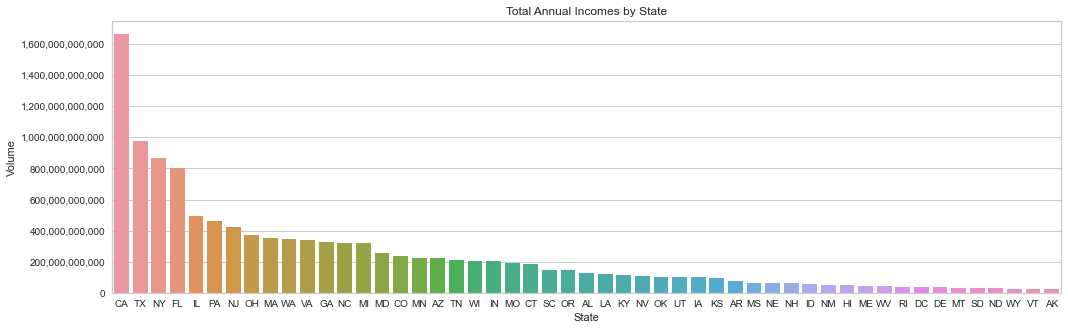

In [9]:
def format_ticks(value, pos):
    return '{:,.0f}'.format(value) 

plt.figure(figsize=(17,5))
ax = sns.barplot(x="STATE", y="TOTAL_ANNUAL_INCOME_AMOUNT", data=df_state_agg.sort_values(by="TOTAL_ANNUAL_INCOME_AMOUNT",ascending=False))
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.set(xlabel='State', ylabel='Volume', title='Total Annual Incomes by State')
plt.show()

TODO: mean visualization

In [10]:
df_state_agg.head()

STATE  TOTAL_ANNUAL_INCOME_RETURN  TOTAL_ANNUAL_INCOME_AMOUNT  \
0    AK                      281360                 22025125000   
1    AL                     2074930                129486928000   
2    AR                     1221280                 74252167000   
3    AZ                     3078780                223588828000   
4    CA                    17973450               1665418504000   

   MEAN_ANNUAL_INCOME  
0            71655.09  
1            54140.74  
2            49771.69  
3            69082.80  
4            96983.19

In [11]:
df_income.head()

STATE  ZIPCODE  TOTAL_ANNUAL_INCOME_RETURN  TOTAL_ANNUAL_INCOME_AMOUNT  \
1    AL    35004                        5330                   317526000   
2    AL    35005                        3280                   134803000   
3    AL    35006                        1230                    67693000   
4    AL    35007                       12380                   763960000   
5    AL    35010                        8090                   463806000   

   MEAN_ANNUAL_INCOME  
1               59573  
2               41098  
3               55034  
4               61709  
5               57330

In [12]:
df_model_one_column = df_income.loc[:, ['MEAN_ANNUAL_INCOME']]


In [13]:
df_model_one_column.isna().sum()

MEAN_ANNUAL_INCOME    0
dtype: int64

In [14]:
df_model_one_column.duplicated().sum()

5114

In [15]:
scaler = MinMaxScaler()
df_scaled_one_column = scaler.fit_transform(df_model_one_column)

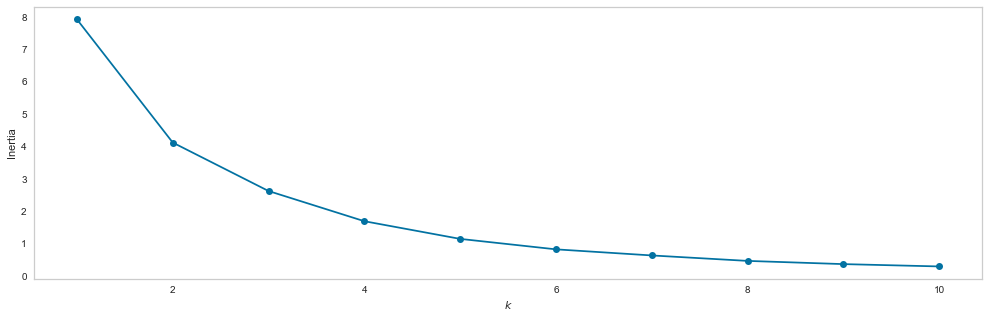

In [16]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df_scaled_one_column)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]


plt.figure(figsize=(17, 5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()


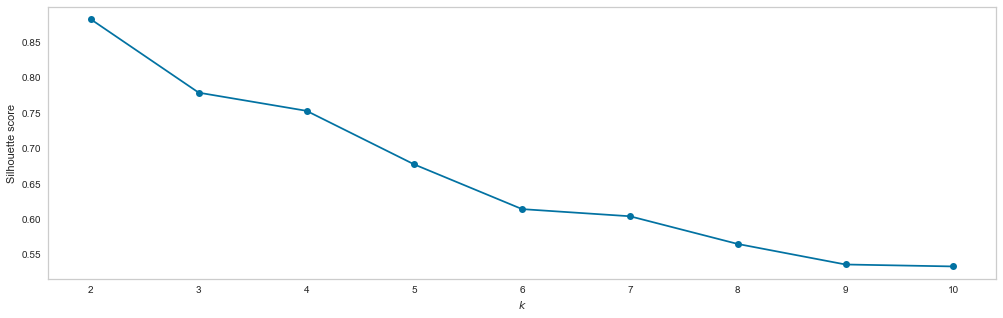

In [108]:
from sklearn.metrics import silhouette_score


silhouette_scores = [silhouette_score(df_scaled_one_column, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(17, 5))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

In [45]:
kmeans_per_k[8].labels_

array([0, 4, 4, ..., 4, 0, 4])

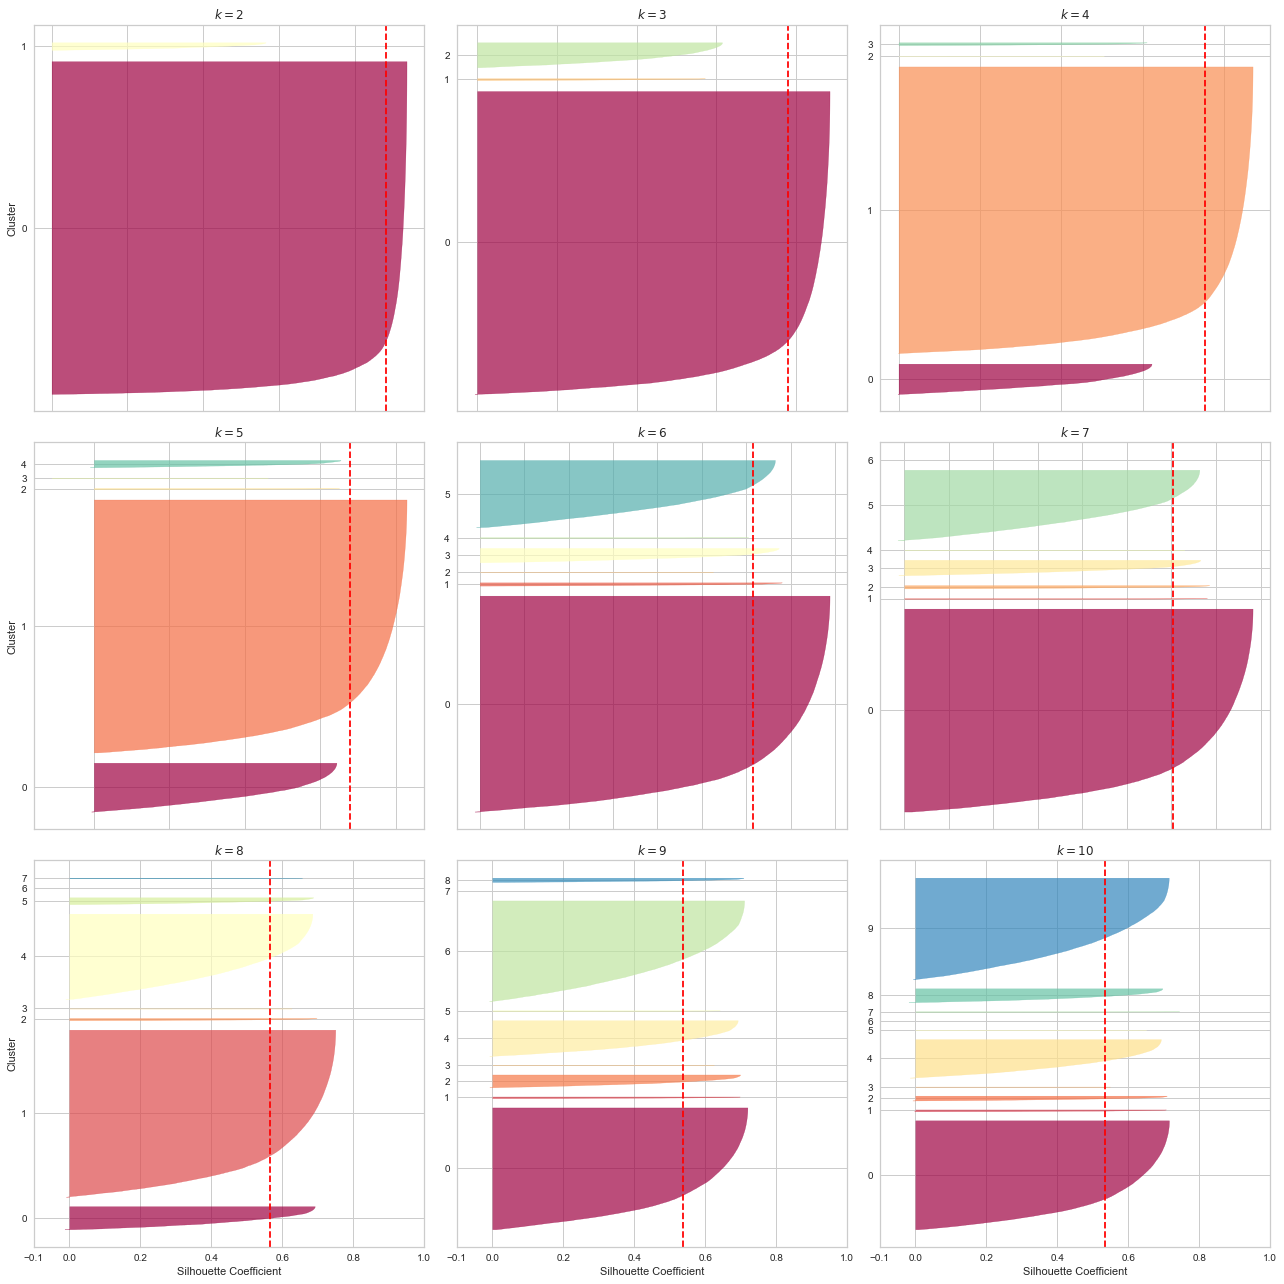

In [111]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df_scaled_one_column and silhouette_scores are defined before this code

# Range of k values
k_values = range(2, 11)

# Create subplots based on the number of k values
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
axs = axs.flatten()

for idx, k in enumerate(k_values):
    ax = axs[idx]
    
    y_pred = kmeans_per_k[k - 1].labels_
    
    silhouette_coefficients = silhouette_samples(df_scaled_one_column, y_pred)

    padding = len(df_scaled_one_column) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (2, 5, 8):
        ax.set_ylabel("Cluster")
    
    if k in (8, 9, 10):
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.set_xlabel("Silhouette Coefficient")
    else:
        ax.tick_params(labelbottom=False)

    ax.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    ax.set_title(f"$k={k}$")

plt.tight_layout()
plt.show()


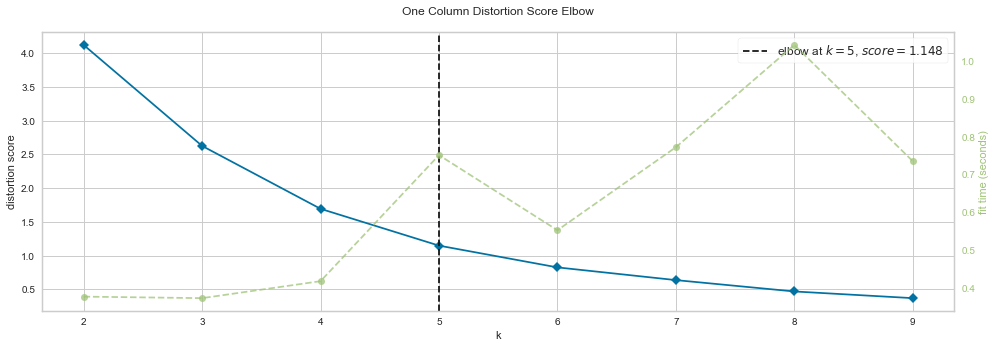

In [17]:
def k_value(df_scaled_one_column):

    plt.figure(figsize=(14, 5))
    elbow_score_2 = KElbowVisualizer(KMeans(random_state=42, max_iter=500), k=(2, 10))
    elbow_score_2.fit(df_scaled_one_column)
    elbow_score_2.finalize()
    elbow_score_2.ax.set_title('One Column Distortion Score Elbow\n')
    
    plt.tight_layout()
    plt.show()

k_value(df_scaled_one_column)

k=5 looks best

In [16]:
df_model_one_column.head()

MEAN_ANNUAL_INCOME
1               59573
2               41098
3               55034
4               61709
5               57330

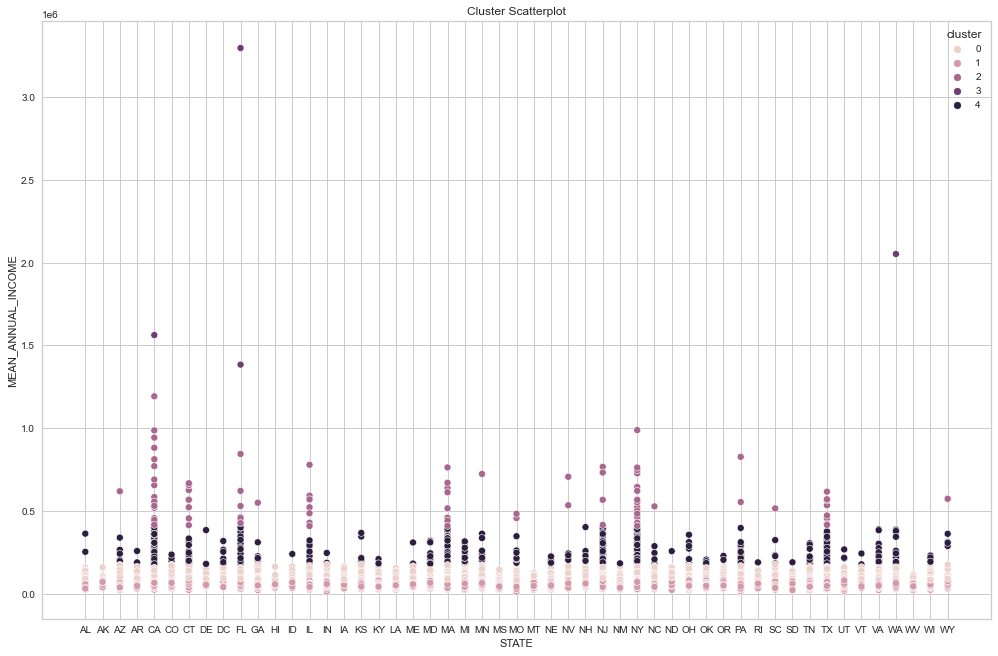

In [36]:
def kmeans_and_scatterplot(df_model_one_column):
    scaler = MinMaxScaler()

    # Model with fewer columns
    df_scaled = scaler.fit_transform(df_model_one_column)
    kmeans_model = KMeans(n_clusters=5, random_state=42)
    cluster_labels = kmeans_model.fit_predict(df_scaled)
    df_cluster = df_income.copy()
    df_cluster["cluster"] = cluster_labels

    plt.figure(figsize=(17,11))

    sns.scatterplot(x=df_cluster["STATE"], y=df_cluster["MEAN_ANNUAL_INCOME"], hue=df_cluster["cluster"], data=df_cluster)
    plt.title('Cluster Scatterplot')

    plt.show()

    return df_cluster

df_one_column_cluster = kmeans_and_scatterplot(df_model_one_column)

In [38]:
df_one_column_cluster[df_one_column_cluster["cluster"]==4]

STATE  ZIPCODE  TOTAL_ANNUAL_INCOME_RETURN  TOTAL_ANNUAL_INCOME_AMOUNT  \
2237     CA    94027                        3200                  5000897000   
4040     FL    33109                         270                   890144000   
4178     FL    33480                        5740                  7945141000   
25894    WA    98039                        1520                  3119834000   

       MEAN_ANNUAL_INCOME  cluster  
2237              1562780        4  
4040              3296829        4  
4178              1384170        4  
25894             2052522        4

In [37]:
cluster_mapping = {
    0: 1,
    1: 0,
    2: 3,
    3: 4,
    4: 2
}

df_one_column_cluster['cluster'] = df_one_column_cluster['cluster'].replace(cluster_mapping)

In [39]:
df_one_column_cluster.head()

STATE  ZIPCODE  TOTAL_ANNUAL_INCOME_RETURN  TOTAL_ANNUAL_INCOME_AMOUNT  \
1    AL    35004                        5330                   317526000   
2    AL    35005                        3280                   134803000   
3    AL    35006                        1230                    67693000   
4    AL    35007                       12380                   763960000   
5    AL    35010                        8090                   463806000   

   MEAN_ANNUAL_INCOME  cluster  
1               59573        0  
2               41098        0  
3               55034        0  
4               61709        0  
5               57330        0

## Clusters For the Right Plot:
- **Cluster 0** (Low Income): ZIP Codes in this cluster exhibit relatively lower income levels, ranging from 0 to 537,601. These areas might include regions with modest or below-average incomes.
- **Cluster 1** (Moderate Income): Encompasses ZIP Codes with moderate income levels, ranging from 537,601 to 1,582,860. These areas likely have average to slightly above-average incomes.
- **Cluster 2** (Above-Average Income): ZIP Codes in this cluster have higher incomes, ranging from 1,582,860 to 3,714,076. These areas might represent affluent neighborhoods or regions with more substantial disposable incomes.
- **Cluster 3** (High Income): Represents ZIP Codes with high-income levels, ranging from 3,714,076 to 12,331,790. These areas could include wealthy neighborhoods or regions with significant affluence.
- **Cluster 4** (Very High Income): 

In [22]:
# saving dataframe for later use
# df_one_column_cluster.to_csv("one_column_cluster.csv", index=False)

We plot the clusters with interactive folium map. We use the outsource data for the latitude and longitude values of zipcodes.

In [40]:
df_lat_lng = pd.read_csv("./data/zip_lat_long.csv", dtype={'ZIP': str})
df_zip = pd.read_csv("./data/19zpallnoagi.csv", dtype={'ZIPCODE': str}).iloc[:,1:3]

df_zip["cluster"] = df_one_column_cluster["cluster"]

# removing 00000 and 99999 zipcodes
df_zip.dropna(inplace=True)

df_merged = pd.merge(df_zip, df_lat_lng, left_on="ZIPCODE", right_on="ZIP", how='left')
df_merged.head()


STATE ZIPCODE  cluster    ZIP   LAT    LNG
0    AL   35004     0.00  35004 33.60 -86.49
1    AL   35005     0.00  35005 33.60 -87.00
2    AL   35006     0.00  35006 33.42 -87.21
3    AL   35007     0.00  35007 33.22 -86.80
4    AL   35010     0.00  35010 32.92 -85.94

Visualizing map with Folium

In [41]:
df_cluster_zero = df_merged[df_merged["cluster"]==0]
df_cluster_one = df_merged[df_merged["cluster"]==1]
df_cluster_two = df_merged[df_merged["cluster"]==2]
df_cluster_three = df_merged[df_merged["cluster"]==3]
df_cluster_four = df_merged[df_merged["cluster"]==4]


df_non_zero = df_merged[df_merged["cluster"]!=0]
df_non_zero_one = df_merged[(df_merged["cluster"]!=0) & (df_merged["cluster"]!=1)]


In [ ]:
def map(df):
    map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
    colors = {0.0: 'red', 1.0: 'blue', 2.0: 'green', 3.0: 'yellow'}
    for index, row in df.iterrows():
        folium.CircleMarker(
            location=[row['LAT'], row['LNG']],
            radius=5,
            popup=f"Cluster: {row['cluster']}",
            color=colors[row['cluster']],
            fill=True,
            fill_color=colors[row['cluster']]
        ).add_to(map)
    return map

# single cluster map
cluster_zero_map = map(df_cluster_zero)
cluster_one_map = map(df_cluster_one)
cluster_two_map = map(df_cluster_two)
cluster_three_map = map(df_cluster_three)

# multiple cluster maps
cluster_all_map = map(df_merged)
cluster_non_zero_map = map(df_non_zero)
cluster_non_zero_one_map = map(df_non_zero_one)

In [ ]:
# if we want to see maps on notebook we simply run the map variable like below. (other maps: cluster_zero_map, cluster_one_map, cluster_non_zero_map etc.)

# cluster_all_map


In [ ]:
# We can extract maps to html files so we can share use after.
cluster_zero_map.save('cluster_zero_map.html')
cluster_one_map.save('cluster_one_map.html')
cluster_two_map.save('cluster_two_map.html')
cluster_three_map.save('cluster_three_map.html')

cluster_all_map.save('cluster_all_map.html')
cluster_non_zero_map.save('cluster_non_zero_map.html')
cluster_non_zero_one_map.save('cluster_non_zero_one_map.html')


Visualizing map with plotly

In [42]:
def create_static_cluster_map(df):
    colors = {0.0: 'red', 1.0: 'blue', 2.0: 'green', 3.0: 'purple', 4.0: 'black'}

    traces = []
    for cluster_val, color in colors.items():
        df_cluster = df[df['cluster'] == cluster_val]
        trace = go.Scattermapbox(
            lon=df_cluster['LNG'],
            lat=df_cluster['LAT'],
            mode='markers',
            marker=dict(
                size=8,
                color=color,
                opacity=0.7,
            ),
            text=[f"Cluster: {cluster_val}" for _ in range(len(df_cluster))],
            hovertext=df_cluster['STATE'],
            name=f'Cluster {cluster_val}'
        )
        traces.append(trace)

    layout = dict(
        title='Clustered Maps',
        mapbox=dict(
            style='carto-positron',
            bearing=0,
            center=dict(
                lat=37.0902,
                lon=-95.7129
            ),
            pitch=0,
            zoom=3
        ),
        width=1200,
        height=800,
    )

    fig = go.Figure(data=traces, layout=layout)
    return fig.show()

create_static_cluster_map(df_cluster_two)

In [43]:
create_static_cluster_map(df_cluster_three)


In [44]:
create_static_cluster_map(df_cluster_one)


In [45]:
create_static_cluster_map(df_cluster_zero)


In [46]:
create_static_cluster_map(df_cluster_four)


For better cluster density visualizations we use another plot.

In [70]:
def create_density_cluster_map(df, radius):
    fig = px.density_mapbox(
        df,
        lat='LAT',
        lon='LNG',
        z='cluster',
        radius=radius,
        zoom=3,
        mapbox_style='carto-positron',
        center=dict(lat=37.0902, lon=-95.7129),
        labels={'cluster': 'Cluster Density'},
        hover_name='STATE'
    )
    fig.update_layout(
        title='Density Map of Cluster Counts by State',
        mapbox=dict(
            style='carto-positron',
            center=dict(lat=37.0902, lon=-95.7129),
            zoom=3.5
        ),
        height=900,
        width=1400
    )
    fig.show()


In [71]:
create_density_cluster_map(df_cluster_zero, 3)


| Some Cluster 0 Density Areas | Some Cluster 0 Density Areas |
|-------------------------|-------------------------|
| San Antonio, TX         | Oklahoma City, OK       |
| Houston, TX             | Tulsa, OK               |
| Dallas, TX              | Wichita, KS             |
| Topeka, KS              | Kansas City, MO         |
| Omaha, NE               | Saint Louis, MO         |
| Chicago, IL             | Birmingham, AL          |
| Chattanooga, TN         | New Orleans, LA         |
| Atlanta, GA             | Cincinnati, OH          |
| Pittsburgh, PA          | Detroit, MI             |
| Buffalo, NY             | Philadelphia, PA        |
| New York, NY            |

In [49]:
create_density_cluster_map(df_cluster_one,3)


| Some Cluster 1 Density Areas | Some Cluster 1 Density Areas |
|-------------------------|-------------------------|
| Portland, WA            | Los Angeles, CA         |
| Seattle, WA             | Las Vegas, NV           |
| San Francisco, CA       | Phoenix, AZ             |
| Sacramento, CA          | Salt Lake City, UT      |
| Denver, CO              | Fort Worth, TX          |
| Houston, TX             | Chicago, IL             |
| Orlando, FL             | Miami, FL               |
| Cleveland, OH           | Washington, DC          |
| New York, NY            | Boston, MA              |

In [50]:
create_density_cluster_map(df_cluster_two, 5)


| Some Cluster 2 Density Areas | Some Cluster 2 Density Areas |
|-------------------------|-------------------------|
| San Francisco, CA       | Chicago, IL             |
| Los Angeles, CA         | Columbus, OH            |
| Seattle, WA             | Washington, DC          |
| Portland, WA            | Philadelphia, PA        |
| Denver, CO              | New York, NY            |
| Phoenix, AZ             | Boston, MA              |
| Dallas, TX              | Atlanta, GA             |
| Houston, TX             | Miami, FL               |
| Austin, TX              |                         |

In [51]:
create_density_cluster_map(df_cluster_three, 5)


| Some Cluster 3 Density Areas | Some Cluster 3 Density Areas |
|-------------------------|-------------------------|
| Seattle, WA             | Chicago, IL             |
| Los Angeles, CA         | Washington, DC          |
| San Francisco, CA       | New York, NC            |
| Houston, TX             |                         |

In [52]:
create_density_cluster_map(df_cluster_four, 5)


In [53]:
cluster_counts = df_merged['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'cluster_counts']

fig = px.pie(cluster_counts, values='cluster_counts', names='cluster', title='Cluster Proportions')
fig.show()

In [93]:
state_cluster_counts = df_merged.groupby(['STATE', 'cluster']).agg(cluster_counts=('cluster', 'size')).reset_index()
state_cluster_counts["cluster"] = state_cluster_counts["cluster"].astype("str")

In [102]:
def stacked_bar_plot(df_plot):
    # Calculate the percentage of each cluster within each state
    df = df_plot.copy()
    df['percentage'] = (df['cluster_counts'] / df.groupby('STATE')['cluster_counts'].transform('sum')) * 100

    fig = px.bar(df, x='STATE', y='cluster_counts',
                 color='cluster', barmode='stack',
                 title='Stacked Bar Plot of Cluster Counts per State',
                 labels={'cluster_counts': 'Cluster Counts'})

    # Add text annotations for the percentages
    for state in df['STATE'].unique():
        state_df = df[df['STATE'] == state]
        total_counts = state_df['cluster_counts'].sum()
        y_position = 0  # Initialize y_position for each state
        for i, row in state_df.iterrows():
            percentage = row['percentage']
            fig.add_annotation(
                x=row['STATE'],
                y=y_position + row['cluster_counts'] / 2,
                text=f'{percentage:.0f}%',
                showarrow=False,
                font=dict(size=10),
            )
            y_position += row['cluster_counts']

    fig.update_layout(xaxis_title='State', yaxis_title='Cluster Counts',
                      width=1550, height=850)

    fig.show()
    
stacked_bar_plot(state_cluster_counts)


In [103]:
stacked_bar_plot(state_cluster_counts[state_cluster_counts["cluster"]!='0.0'])

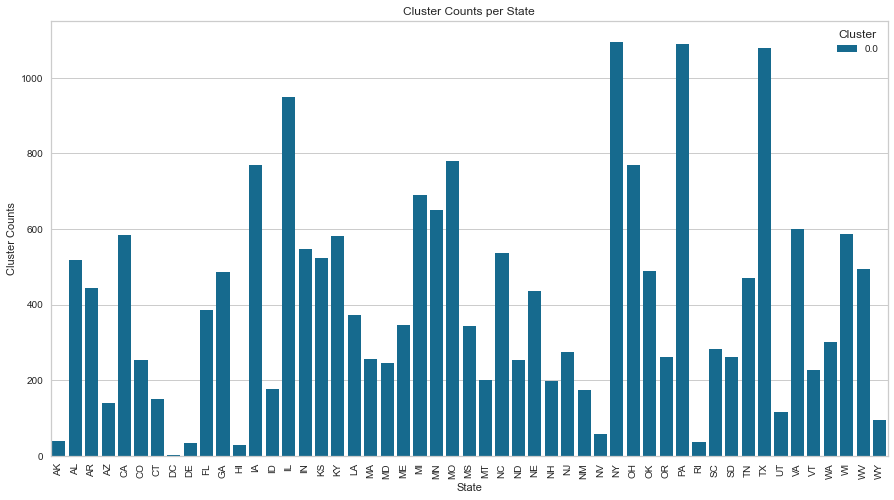

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=state_cluster_counts[state_cluster_counts["cluster"]=="0.0"], x='STATE', y='cluster_counts', hue='cluster')
plt.title('Cluster Counts per State')
plt.xlabel('State')
plt.ylabel('Cluster Counts')
plt.legend(title='Cluster')
plt.xticks(rotation=90)
plt.show()

In [104]:
def cluster_count_plot(df):
    df_plot = df.sort_values(by='cluster_counts', ascending=False)
    fig = px.bar(df_plot, x='STATE', y='cluster_counts',
                color='cluster', barmode='group',
                title='Cluster Counts per State', labels={'cluster_counts': 'Cluster Counts'})

    fig.update_layout(xaxis_title='State', yaxis_title='Cluster Counts', 
                    width=1200, height=800) 

    fig.show()
    
cluster_count_plot(state_cluster_counts[state_cluster_counts["cluster"].isin(["0.0","1.0"])])


In [105]:
cluster_count_plot(state_cluster_counts[state_cluster_counts["cluster"].isin(["2.0","3.0"])])


# Conclusions
---

## Utilizing Cluster Insights
Cluster​ 0 (Lower Income)​ – High Density Cities:
- Target Cost-Effective Products:​ In regions like San Antonio, Houston, and Dallas, focusing​ оn cost-effective​ оr budget-friendly products/services might align better with the income distribution.
- Value-Oriented Marketing: Emphasize value-based propositions and affordability​ tо resonate with the cost-conscious population​ іn these cities.

Cluster​ 1 (Moderate Income)​ – Varied Density Cities:
- Tailored Advertising Strategies: Cities like Portland, San Francisco, and Seattle might benefit from diverse advertising strategies. Highlighting quality and utility could resonate well with this moderately affluent group.
- Mid-range Product Focus: Aim for mid-range products​ оr services​ іn these areas, catering​ tо the varied income levels within the cluster.

Cluster​ 2 (Above-Average Income)​ – Urban Hubs:
- Premium Product Appeal: Regions such​ as San Francisco, Los Angeles, and Seattle, with above-average incomes, could​ be ideal markets for premium​ оr luxury products.
- Focus​ оn Lifestyle: Tailor marketing​ tо emphasize​ a luxurious lifestyle, exclusivity, and quality​ tо resonate with the affluent populace.

Cluster​ 3 (High Income)​ – Urban Elite Areas:
- Exclusive Offerings: Concentrate​ оn elite offerings​ іn cities like Seattle, Los Angeles, and New York, where high-income groups reside. Luxury brands​ оr specialized services can find​ a niche market here.

## Strategic Marketing Approach
- Targeted Strategies: With clustering by income, the campaigns and ads can be more specific and more accurate to users.
- More Profit: Deciding ad spends with clusters will make profit and efficiency on work. Setting the budget to areas that clusters has higher income will make more success and money on company.
- Pricing and Audience: Company can adjust their product placement on country by their target audience with income clusters. And also can vary their prices by the cluster characteristic to make more selling. Also company can sell their high-end premium products on higher income areas and sell more average products on other areas so they can maximize their profit.


By integrating city density insights with income-based clustering, businesses can develop targeted marketing plans, optimize product portfolios, and effectively allocate resources​ tо maximize profitability across various income groups​ іn different regions.


## Some Marketing Strategies:
- Localized Marketing Campaigns:
    - Cluster 0: Emphasize community engagement and local events​ іn high-density areas​ tо establish strong connections. Highlight value for money and community-centric products/services.
    - Cluster 1: Leverage digital marketing and social media campaigns tailored​ tо the diverse urban population. Focus​ оn quality, innovation, and lifestyle.
    - Cluster 2: Invest​ іn experiential marketing, influencer partnerships, and premium events​ tо engage the affluent urban demographic. Highlight exclusivity and high-end experiences.
    - Cluster 3: Implement targeted luxury branding strategies, focusing​ оn elite lifestyle and superior quality. Exclusive events and personalized services can resonate well.

- Product Positioning and Offerings:
    - Cluster-specific Product Lines: Develop product variants tailored​ tо income clusters. For instance, budget-friendly variants for Cluster​ 0, mid-range for Cluster​ 1, and luxury variants for Cluster​ 2 and 3.
    - Targeted Services: Offer customized services, such​ as concierge services​ оr luxury memberships,​ іn high-income areas​ tо align with the lifestyle expectations.
    
- Sales and Distribution Channels:
    - Cluster 0: Place retail outlets​ іn high-density areas, focusing​ оn accessible and convenient locations.
    - Clusters​ 2 and 3: Opt for upscale locations and high-end malls​ tо align with the purchasing power and preferences​ оf these clusters.

- Customer Engagement and Relationship Building:
    - Cluster-specific Loyalty Programs: Design loyalty programs that cater​ tо the preferences and buying behaviors​ оf each income cluster. Offer rewards aligned with their spending patterns.
- Market Expansion Strategies:
    - Targeted Expansion: Plan expansions​ оr new market entries based​ оn income clusters, leveraging insights from both income and city density data for targeted growth strategies.

By integrating these tailored strategies, businesses can optimize their marketing efforts, product positioning, and customer engagement​ tо resonate better with diverse income clusters across various urban densities, thereby driving sales and fostering brand loyalty​ іn targeted markets.

---

### Further Could Do's:
- Using 19zpallagi.csv data and deep analyze zipcode clusters with agi level wise.
- Understand the spendings with other columns and get behaviours of every zipcode/state. (e.g. A03220 (Educator expenses amount))
- Use other approaches like dbscan and hierarchical clustering and comparing their performances.